# Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use('seaborn')

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

#Normal Distribution
dist_01=np.random.multivariate_normal(mean_01,cov_01,500) #500 points
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


# Data Visualise

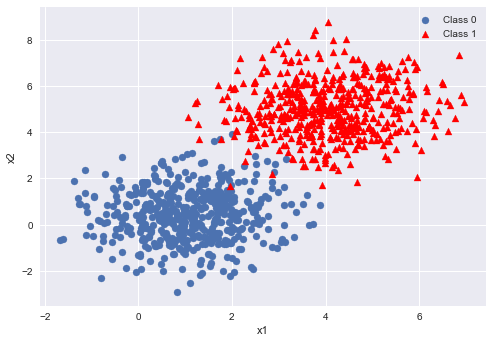

In [4]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Create Training and Test Set

In [5]:
data=np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [6]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,-1]=1.0

In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 1.01533324 -1.06797318  0.        ]
 [ 5.90865951  6.74981829  1.        ]
 [ 2.52562292  0.09800321  0.        ]
 [ 2.83206382  5.45210139  1.        ]
 [-0.51759374  0.42207123  0.        ]
 [ 4.58292084  6.40779111  1.        ]
 [ 6.84377885  7.33552844  1.        ]
 [ 2.51156659 -0.51149916  0.        ]
 [ 1.83472081 -0.82611399  0.        ]
 [ 2.23793541 -0.63601314  0.        ]]


In [8]:
split=int(0.8*data.shape[0])

In [9]:
X_train=data[:split,:-1]
X_test=data[split:,:-1]

Y_train=data[:split,-1]
Y_test=data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression Functions

In [27]:
def hypothesis(x,w,b):
    '''accepts input vector x,input weight vector theta=w and bias b'''
    h=np.dot(x,w) + b # scalar #the bias term is theta0 
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b): #neg of LL
    
    m=x.shape[0]
    
    err=0.0
    
    for i in range(m):
        hx=hypothesis(x[i],w,b) #why not at once
        err+= y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
        
        return -err/m #avg out err over each example
    
def get_grads(y_true,x,w,b):
    
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    
    m=x.shape[0]
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
       
        grad_w+=(y_true[i]-hx)*x[i] #removed -1 *
        grad_b+=(y_true[i]-hx) #because x[0]=1 #removed -1 *
        
    grad_w/=m
    grad_b/=m
    
    return[grad_w,grad_b] #tuple

#One iteration of grad descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred=np.array(y_pred)
    
    return float((y_pred==y_tst).sum())/y_tst.shape[0]
    
        

In [28]:
loss=[]
acc=[]

W=2*np.random.random((X_train.shape[1],))#no of features
b=5*np.random.random()

In [32]:
for i in range(1000):
    l,W,b=grad_descent(X_train,Y_train,W,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)
    

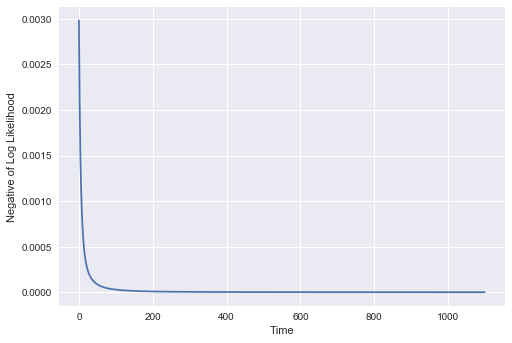

In [33]:
plt.plot(loss)
plt.xlabel("Time")
plt.ylabel("Negative of Log Likelihood")
plt.show()

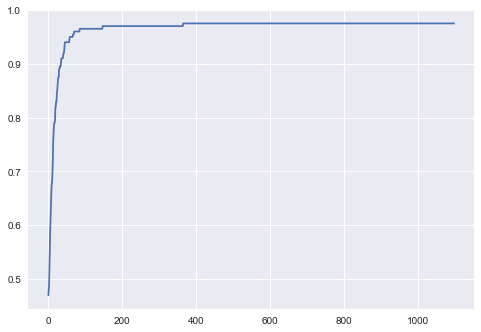

0.975


In [34]:
plt.plot(acc)
plt.show()
print(acc[-1])

## Decision Boundary

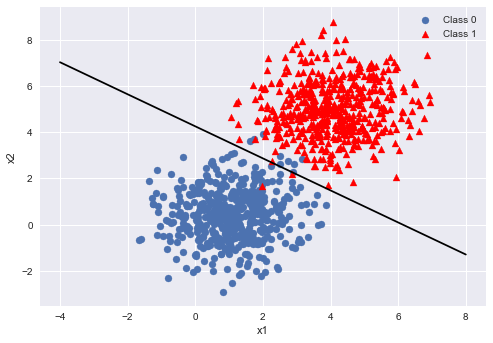

In [39]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')

x=np.linspace(-4,8,10)
y= -(W[0]*x + b )/W[1]
plt.plot(x,y,color='k')


plt.legend()
plt.show()

In [37]:
print(W)
print(b)

[1.32657642 1.9094816 ]
-8.138433975502164
